**Analisis exploratorio de datos (EDA)**


Importamos las librerías necesarias

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import math
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


Cargamos nuestra base de datos en un frame de Pandas

In [14]:
# Cargamos las bases de datos en dataframes de pandas
df_1 = pd.read_csv("synthetic_mmm_weekly_india_SAT.csv")
df_2 = pd.read_csv("synthetic_mmm_weekly_india.csv")

# Visualizamos el frame
print("---------------------------------------------------------------------------------------")
print(df_1.head(5))
print("\n-------------------------------------------------------------------------------------\n")
print(df_2.head(5))


---------------------------------------------------------------------------------------
         Week      Geo   Brand          SKU  Sales_Units   Sales_Value  \
0  2022-07-02  CENTRAL  BrandA  BrandA_SKU1   166.737425  15058.472804   
1  2022-07-02  CENTRAL  BrandA  BrandA_SKU2   123.326990  11166.439172   
2  2022-07-02  CENTRAL  BrandA  BrandA_SKU3    74.232953   7829.352426   
3  2022-07-02  CENTRAL  BrandB  BrandB_SKU1   216.583770  15986.585046   
4  2022-07-02  CENTRAL  BrandB  BrandB_SKU2   272.920195  22565.283219   

          MRP   Net_Price  Feature_Flag  Display_Flag  TPR_Flag   Trade_Spend  \
0   90.312495   90.312495             0             0         0  13484.104001   
1   90.543353   90.543353             0             0         0  13484.104001   
2  105.470039  105.470039             0             0         0  13484.104001   
3   73.812479   73.812479             0             0         0  13484.104001   
4   82.680885   82.680885             0             0         

Revisamos que ambas bases de datos no sean idénticas

In [15]:
# Comparamos ambos DataFrames
comparison = df_1.equals(df_2)
print(f"¿Los DataFrames son idénticos? {comparison}")

¿Los DataFrames son idénticos? False


Revisamos las características generales de los dataset

In [16]:
# Dimenciones  
print(f"Sus dimensiones son:\n\ndf_1: {df_1.shape}\ndf_2: {df_2.shape}")
print(" ")

# comparación de nombres de columnas (ignorando el orden)
print("Tienen la misma cantidad de columnas con los mismos nombres:", set(df_1.columns) == set(df_2.columns))
print(" ")


Sus dimensiones son:

df_1: (11232, 28)
df_2: (11232, 28)
 
Tienen la misma cantidad de columnas con los mismos nombres: True
 


Buscamos:
- Tipos de datos. 
- Valores nulos.
- Valores duplicados. 
- Uso de memoria.

In [17]:
# Información general de ambos DataFrames
print(f"Informacion del primer data set:---------------------\n")
df_1.info() 
print(" ")

print(f"Informacion del segundo data set:---------------------\n")
df_2.info() 
print(" ")

# Verificamos si hay valores nulos en ambos DataFrames
print(f"Valores nulos en df_1:\n---------------------------------\n{df_1.isnull().sum()}\n") 
print(f"Valores nulos en df_2:\n----------------------------------\n{df_2.isnull().sum()}\n") 

# Verificamos si hay filas duplicadas en ambos DataFrames    
print(f"----------------------------------\nDuplicados en df_1: {df_1.duplicated().sum()}") 
print(f"Duplicados en df_2: {df_2.duplicated().sum()}")


Informacion del primer data set:---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Week                     11232 non-null  object 
 1   Geo                      11232 non-null  object 
 2   Brand                    11232 non-null  object 
 3   SKU                      11232 non-null  object 
 4   Sales_Units              11232 non-null  float64
 5   Sales_Value              11232 non-null  float64
 6   MRP                      11232 non-null  float64
 7   Net_Price                11232 non-null  float64
 8   Feature_Flag             11232 non-null  int64  
 9   Display_Flag             11232 non-null  int64  
 10  TPR_Flag                 11232 non-null  int64  
 11  Trade_Spend              11232 non-null  float64
 12  TV_Impressions           11232 non-null  float64
 13  YouTube_Impressions  

- Notamos que el tipo de dato de **"Week"** esta como **"Object"** asi que cambiamos el tipo de dato de la columna **"week"** a **"datetime64[ns]"**
- también tenemos datos **"object"** así que para reducir el espacio en memoria los cambiaremos a **"category"**
- Por último, estandarizaremos el texto a todos en mayúsculas


In [18]:

# Creamos una lista con las columnas de texto
text_cols = ['Geo','Brand','SKU']
df_1[text_cols]

# Estandarizamos los textos a mayúsculas y cambiamos a tipo "category"
for col in text_cols:
    df_1[col] = df_1[col].str.upper().astype('category')
    df_2[col] = df_2[col].str.upper().astype('category')

# Convertimos la columna "Week" a tipo datetime, manejando errores
df_1["Week"] = pd.to_datetime(df_1["Week"], errors="coerce")
df_2["Week"] = pd.to_datetime(df_2["Week"], errors="coerce")

# Revisamos el cambio
print(f"Informacion del primer data set:---------------------\n")
df_1.info()
print(" ")
print(f"Informacion del segundo data set:---------------------\n")
df_2.info()

# visualizamos un df
df_1

Informacion del primer data set:---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Week                     11232 non-null  datetime64[ns]
 1   Geo                      11232 non-null  category      
 2   Brand                    11232 non-null  category      
 3   SKU                      11232 non-null  category      
 4   Sales_Units              11232 non-null  float64       
 5   Sales_Value              11232 non-null  float64       
 6   MRP                      11232 non-null  float64       
 7   Net_Price                11232 non-null  float64       
 8   Feature_Flag             11232 non-null  int64         
 9   Display_Flag             11232 non-null  int64         
 10  TPR_Flag                 11232 non-null  int64         
 11  Trade_Spend              11232 non-nul

,Week,Geo,Brand,SKU,Sales_Units,Sales_Value,MRP,Net_Price,Feature_Flag,Display_Flag,TPR_Flag,Trade_Spend,TV_Impressions,YouTube_Impressions,Facebook_Impressions,Instagram_Impressions,Print_Readership,Radio_Listenership,FB_Banner_Content_Score,IG_Banner_Content_Score,Weighted_Distribution,Numeric_Distribution,TDP,NOS,CPI,GDP_Growth,Festival_Index,Rainfall_Index
0,2022-07-02,CENTRAL,BRANDA,BRANDA_SKU1,166.737425,15058.472804,90.312495,90.312495,0,0,0,13484.104001,9.403240e+05,399531.287472,194714.632305,99377.720725,69900.234920,9.412262e+05,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
1,2022-07-02,CENTRAL,BRANDA,BRANDA_SKU2,123.326990,11166.439172,90.543353,90.543353,0,0,0,13484.104001,9.936484e+05,427878.462663,217002.398322,107275.932365,82191.926749,1.112188e+06,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
2,2022-07-02,CENTRAL,BRANDA,BRANDA_SKU3,74.232953,7829.352426,105.470039,105.470039,0,0,0,13484.104001,9.252477e+05,359415.630394,184202.571095,90303.383188,71781.738502,9.016579e+05,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
3,2022-07-02,CENTRAL,BRANDB,BRANDB_SKU1,216.583770,15986.585046,73.812479,73.812479,0,0,0,13484.104001,7.175093e+05,306314.756904,164117.739384,77674.725319,55083.280799,7.403750e+05,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
4,2022-07-02,CENTRAL,BRANDB,BRANDB_SKU2,272.920195,22565.283219,82.680885,82.680885,0,0,0,13484.104001,6.650028e+05,293227.449769,157279.462792,74373.436233,55995.997094,6.820445e+05,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,2025-06-21,WEST,BRANDB,BRANDB_SKU2,464.265398,34966.742688,83.973091,75.316280,0,1,1,225984.297580,8.742822e+05,348642.167865,213547.375610,91083.171134,104558.432329,8.413412e+05,56.761921,63.238274,0.773801,0.932547,89.784799,3.990173,137.776968,4.439521,0.945333,5.147286
11228,2025-06-21,WEST,BRANDB,BRANDB_SKU3,1102.182610,72163.074413,73.688403,65.472884,0,1,1,225984.297580,1.003607e+06,384375.878640,202098.199209,97084.995649,119387.583792,9.450148e+05,56.761921,63.238274,0.773801,0.932547,89.784799,3.990173,137.776968,4.439521,0.945333,5.147286
11229,2025-06-21,WEST,BRANDC,BRANDC_SKU1,1144.234814,54845.202065,55.653890,47.931772,0,1,1,225984.297580,3.793441e+05,148306.780555,74100.106202,37071.366731,40752.114645,3.236321e+05,56.761921,63.238274,0.773801,0.932547,89.784799,3.990173,137.776968,4.439521,0.945333,5.147286
11230,2025-06-21,WEST,BRANDC,BRANDC_SKU2,318.221874,15948.330673,58.023703,50.117016,0,1,1,225984.297580,5.071747e+05,235720.917313,103937.020273,57537.885490,60140.312517,4.722871e+05,56.761921,63.238274,0.773801,0.932547,89.784799,3.990173,137.776968,4.439521,0.945333,5.147286


Ahora buscaremos cuales son las diferentes categorías de mis columnas categóricas

In [19]:
# Revisamos los nombre de las diferentes categorías de las columnas categoricas de ambos DataFrames
for col in text_cols:
    c1 = df_1[col].cat.categories
    c2 = df_2[col].cat.categories
    
    print(f"Categorias en '{col}' del df_1:\n",list(c1))
    print(" ")
    print(f"Categorias en '{col}' del df_2:\n",list(c2))
    print(" ")
    print("------------------------------------------------------------------------------------------------------------------------------------------")

# Revisamos la cantidad de cat0egorías en las columnas categoricas de ambos DataFrames
for col in text_cols:
    print(f"Cantidad de categorias en '{col}' del df_1:", df_1[col].nunique())
    print(f"Cantidad de categorias en '{col}' del df_2:", df_2[col].nunique())
    print(" ")
    
    

Categorias en 'Geo' del df_1:
 ['CENTRAL', 'EAST', 'METRO_DELHI', 'METRO_MUMBAI', 'NORTH', 'NORTHEAST', 'SOUTH', 'WEST']
 
Categorias en 'Geo' del df_2:
 ['CENTRAL', 'EAST', 'METRO_DELHI', 'METRO_MUMBAI', 'NORTH', 'NORTHEAST', 'SOUTH', 'WEST']
 
------------------------------------------------------------------------------------------------------------------------------------------
Categorias en 'Brand' del df_1:
 ['BRANDA', 'BRANDB', 'BRANDC']
 
Categorias en 'Brand' del df_2:
 ['BRANDA', 'BRANDB', 'BRANDC']
 
------------------------------------------------------------------------------------------------------------------------------------------
Categorias en 'SKU' del df_1:
 ['BRANDA_SKU1', 'BRANDA_SKU2', 'BRANDA_SKU3', 'BRANDB_SKU1', 'BRANDB_SKU2', 'BRANDB_SKU3', 'BRANDC_SKU1', 'BRANDC_SKU2', 'BRANDC_SKU3']
 
Categorias en 'SKU' del df_2:
 ['BRANDA_SKU1', 'BRANDA_SKU2', 'BRANDA_SKU3', 'BRANDB_SKU1', 'BRANDB_SKU2', 'BRANDB_SKU3', 'BRANDC_SKU1', 'BRANDC_SKU2', 'BRANDC_SKU3']
 
------

Revisamos todas las columnas numericas y al mismo tiempo obtenemos valores estadisticos como...
- Count
- Mean
- Min
- 25%
- 50%
- 75%
- Max
- Std

In [20]:
# Ajustamos las opciones de pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Revisamos todas las columnas numericas usando describe()
df_1.describe()


,Week,Sales_Units,Sales_Value,MRP,Net_Price,Feature_Flag,Display_Flag,TPR_Flag,Trade_Spend,TV_Impressions,YouTube_Impressions,Facebook_Impressions,Instagram_Impressions,Print_Readership,Radio_Listenership,FB_Banner_Content_Score,IG_Banner_Content_Score,Weighted_Distribution,Numeric_Distribution,TDP,NOS,CPI,GDP_Growth,Festival_Index,Rainfall_Index
count,11232,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,1.123200e+04,1.123200e+04,1.123200e+04,11232.000000,11232.000000,1.123200e+04,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000
mean,2023-12-26 12:00:00,409.144276,32453.433540,79.687066,78.108492,0.186699,0.184295,0.158654,56784.061640,1.031174e+06,4.919045e+05,3.890921e+05,137290.113612,91547.116108,3.153335e+05,70.372429,65.332445,0.646951,0.670508,65.049250,4.396893,132.280576,5.082094,1.683299,2.151666
min,2022-07-02 00:00:00,29.971872,2566.350247,52.906281,46.028997,0.000000,0.000000,0.000000,5326.099777,1.251198e+05,3.918010e+04,3.692248e+04,20539.510699,9924.996431,2.922427e+04,48.560626,30.066035,0.312468,0.313900,27.705402,2.578997,114.873524,3.488797,0.934774,0.343123
25%,2023-03-30 06:00:00,198.665547,14754.451778,63.358215,62.805069,0.000000,0.000000,0.000000,13014.249886,4.446529e+05,2.126797e+05,1.638624e+05,72662.788288,37999.572631,1.333769e+05,63.573587,55.580581,0.512283,0.527513,50.389215,3.816038,126.449164,4.686955,0.976820,0.954376
50%,2023-12-26 12:00:00,325.212428,24592.362351,79.790936,78.143183,0.000000,0.000000,0.000000,21045.395175,7.716231e+05,3.633789e+05,2.775063e+05,113585.195039,66694.612924,2.268250e+05,70.205004,66.091909,0.636878,0.655696,63.424177,4.348179,132.438203,5.044538,1.139112,1.285723
75%,2024-09-22 18:00:00,528.543722,40811.772659,93.308157,91.933471,0.000000,0.000000,0.000000,80548.805525,1.226365e+06,6.103292e+05,5.043419e+05,177300.557401,116369.664007,3.855884e+05,76.468158,75.414566,0.766018,0.792686,77.774855,4.918074,137.780111,5.493578,2.477604,3.791379
max,2025-06-21 00:00:00,3334.884340,262753.520416,112.783671,112.783671,1.000000,1.000000,1.000000,481378.091967,6.064175e+06,3.004404e+06,2.800156e+06,666264.211071,622434.632084,2.094573e+06,94.397584,96.572017,1.000000,1.000000,115.761797,7.762666,148.898300,6.614460,3.553047,6.166558
std,NaN,306.305614,27000.516407,16.358434,16.438529,0.389687,0.387742,0.365369,66045.213932,8.945035e+05,4.052517e+05,3.369887e+05,88369.160508,83550.305364,2.791599e+05,9.148711,12.803109,0.167785,0.171485,18.578824,0.787389,7.696734,0.554610,0.936699,1.583922


Notamos lo siguiente:
- **count** indica que no hay valores nulos, ya que no hay valores faltantes, puesto que marca el número máximo de filas 11232 en todas las columnas.
- **mean** o media, indica el valor medio de toda nuestra columna.
- **50%** o mediana, si la **media** está lejos del valor de la **mediana** puede haber asimetría, es decir los valores pueden inclinarse más a un lado u a otro
- **std** indica que hay muchas columnas con valores muy dispersos, esto puede ser un indicador de que algunas campañas publicitarias afectan la dispersión de los resultados como se ve en **Sales_units** ya que si fuera un valor bajo indicaría valores cerca de la media.
- **25%** indica que todos los valores debajo de este porcentaje son el 25% de los datos (datos más bajos)
- **75%** indica que todos los valores debajo de este porcentaje representan el 75% de los datos (datos más altos)
- **max** indica el valor más alto de la columna 
- **min** indica el valor más pequeño de la columna 

Hacemos un grafico de caja y bigotes para ver la dispercion de nuestros datos para ello hacemos lo siguiente:
- Seleccionamos de nuestro dataframe solo las columnas que son numericas
- Usaremos sns.boxplot

Cantidad de columnas numericas: 21


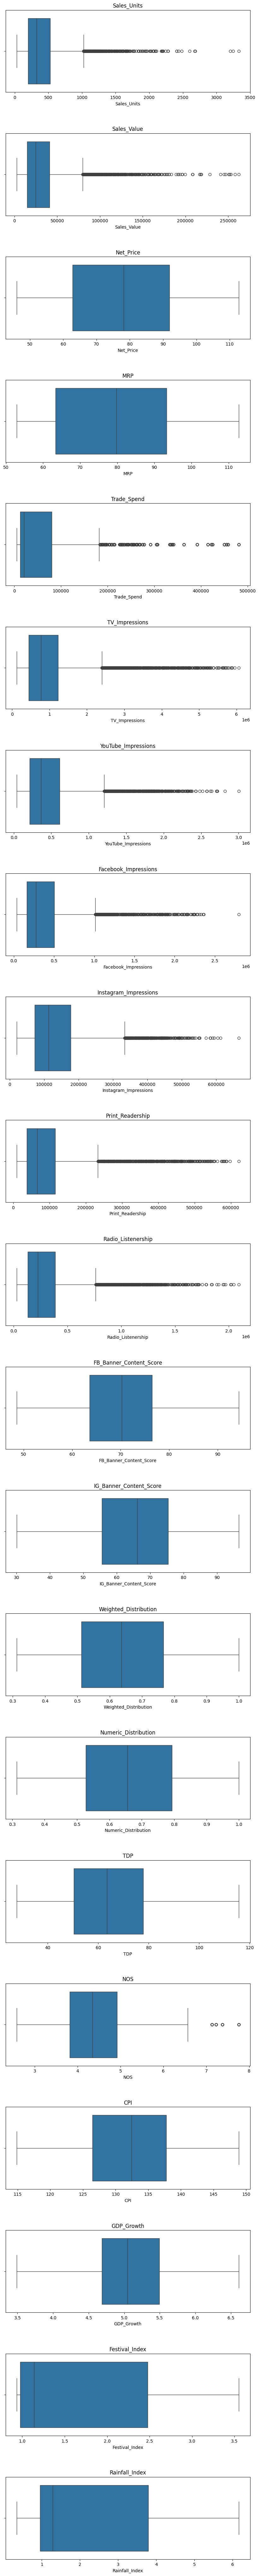

In [21]:
# Columnas numericas de interes
columns_numericas = ['Sales_Units', 'Sales_Value','Net_Price', 'MRP', 'Trade_Spend', 'TV_Impressions', 'YouTube_Impressions', 'Facebook_Impressions', 'Instagram_Impressions', 'Print_Readership', 'Radio_Listenership', 'FB_Banner_Content_Score', 'IG_Banner_Content_Score', 'Weighted_Distribution', 'Numeric_Distribution', 'TDP', 'NOS', 'CPI', 'GDP_Growth', 'Festival_Index', 'Rainfall_Index']

# Cantidad de columnas numericas
n1 = len(columns_numericas)
print(f"Cantidad de columnas numericas: {n1}")


# Graficos de caja y bigotes para el primer DataFrame ---------------------------------------------
fig,ax = plt.subplots(nrows=n1, ncols=1, figsize=(10,5*n1))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_numericas):
    sns.boxplot(x=col, data=df_1, ax=ax[i])   # horizontal (x=col). Para vertical, usa y=col.
    ax[i].set_title(col)





Ignorar

In [22]:
df = df_1.copy()

sum_cols  = ["Sales_Units","Sales_Value","TV_Impressions","YouTube_Impressions",
            "Facebook_Impressions","Instagram_Impressions","Print_Readership",
            "Radio_Listenership","Trade_Spend"]

mean_cols = ["Net_Price","MRP","Weighted_Distribution","Numeric_Distribution",
            "FB_Banner_Content_Score","IG_Banner_Content_Score",
            "TDP","NOS","CPI","GDP_Growth","Festival_Index","Rainfall_Index"]

flag_cols = ["TPR_Flag","Feature_Flag","Display_Flag"]

agg_map = {}

for c in sum_cols:
    agg_map[c] = "sum"     # se acumula

for c in mean_cols:
    agg_map[c] = "mean"    # nivel/promedio

for c in flag_cols:
    agg_map[c] = "max"     # si alguna fila tuvo 1, la semana queda 1

weekly = df.groupby("Week", as_index=True).agg(agg_map).sort_index()
display(weekly)

# # weekly.skew()


,Sales_Units,Sales_Value,TV_Impressions,YouTube_Impressions,Facebook_Impressions,Instagram_Impressions,Print_Readership,Radio_Listenership,Trade_Spend,Net_Price,MRP,Weighted_Distribution,Numeric_Distribution,FB_Banner_Content_Score,IG_Banner_Content_Score,TDP,NOS,CPI,GDP_Growth,Festival_Index,Rainfall_Index,TPR_Flag,Feature_Flag,Display_Flag
Week,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-02,12150.060435,9.834610e+05,4.719649e+07,2.259107e+07,1.767161e+07,6.285375e+06,4.957452e+06,4.369729e+07,1.061274e+06,79.251324,79.251324,0.388195,0.411264,72.988935,82.036650,39.811585,3.483373,120.597676,5.259084,1.067458,4.845255,0,0,0
2022-07-09,15770.625753,1.285151e+06,5.167204e+07,2.188195e+07,1.786018e+07,6.162407e+06,5.223712e+06,4.095458e+07,5.337323e+06,79.390440,79.390440,0.403794,0.440363,71.538819,68.172876,42.081454,3.245365,120.990697,5.186734,1.067458,4.401524,0,1,0
2022-07-16,18020.929968,1.460663e+06,5.018396e+07,1.991825e+07,1.606629e+07,5.590279e+06,5.020817e+06,4.890272e+07,6.400798e+06,79.370354,79.370354,0.455640,0.464504,76.103267,82.564131,46.277964,3.783232,121.380186,5.542674,1.067458,3.870703,0,1,0
2022-07-23,16916.517071,1.371041e+06,4.585349e+07,2.141614e+07,1.393107e+07,5.676334e+06,4.626512e+06,4.662965e+07,7.691721e+05,79.414247,79.414247,0.474111,0.535838,74.762657,87.963311,48.692350,4.148519,121.762660,5.912210,1.067458,4.459773,0,0,0
2022-07-30,15958.631832,1.298986e+06,4.855489e+07,2.190487e+07,1.528744e+07,5.909717e+06,5.140604e+06,5.150043e+07,8.085941e+05,79.337658,79.337658,0.468039,0.442994,74.955648,65.162075,54.542262,4.348360,122.134740,5.455425,1.067458,3.939759,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-24,46144.265980,3.309948e+06,4.762163e+07,6.140823e+07,1.528355e+07,1.381000e+07,4.789073e+06,1.407991e+07,6.947899e+06,70.011428,79.978973,0.846038,0.851490,59.113504,45.806446,79.007512,4.707308,142.218700,4.735539,1.067458,0.874034,1,0,0
2025-05-31,41997.878805,3.100582e+06,4.794963e+07,6.572569e+07,1.466170e+07,1.461131e+07,4.804756e+06,1.388225e+07,6.104225e+06,72.565412,80.039182,0.857141,0.916586,63.381666,44.737413,75.667429,4.014863,142.577159,4.478228,1.067458,1.237025,1,0,0
2025-06-07,30263.407819,2.475268e+06,4.950294e+07,2.052361e+07,1.688114e+07,5.792835e+06,4.958492e+06,4.620136e+07,1.046482e+06,80.112456,80.112456,0.875501,0.918880,60.846060,55.233534,79.383797,4.708756,142.949240,4.839401,1.067458,4.186017,0,0,0


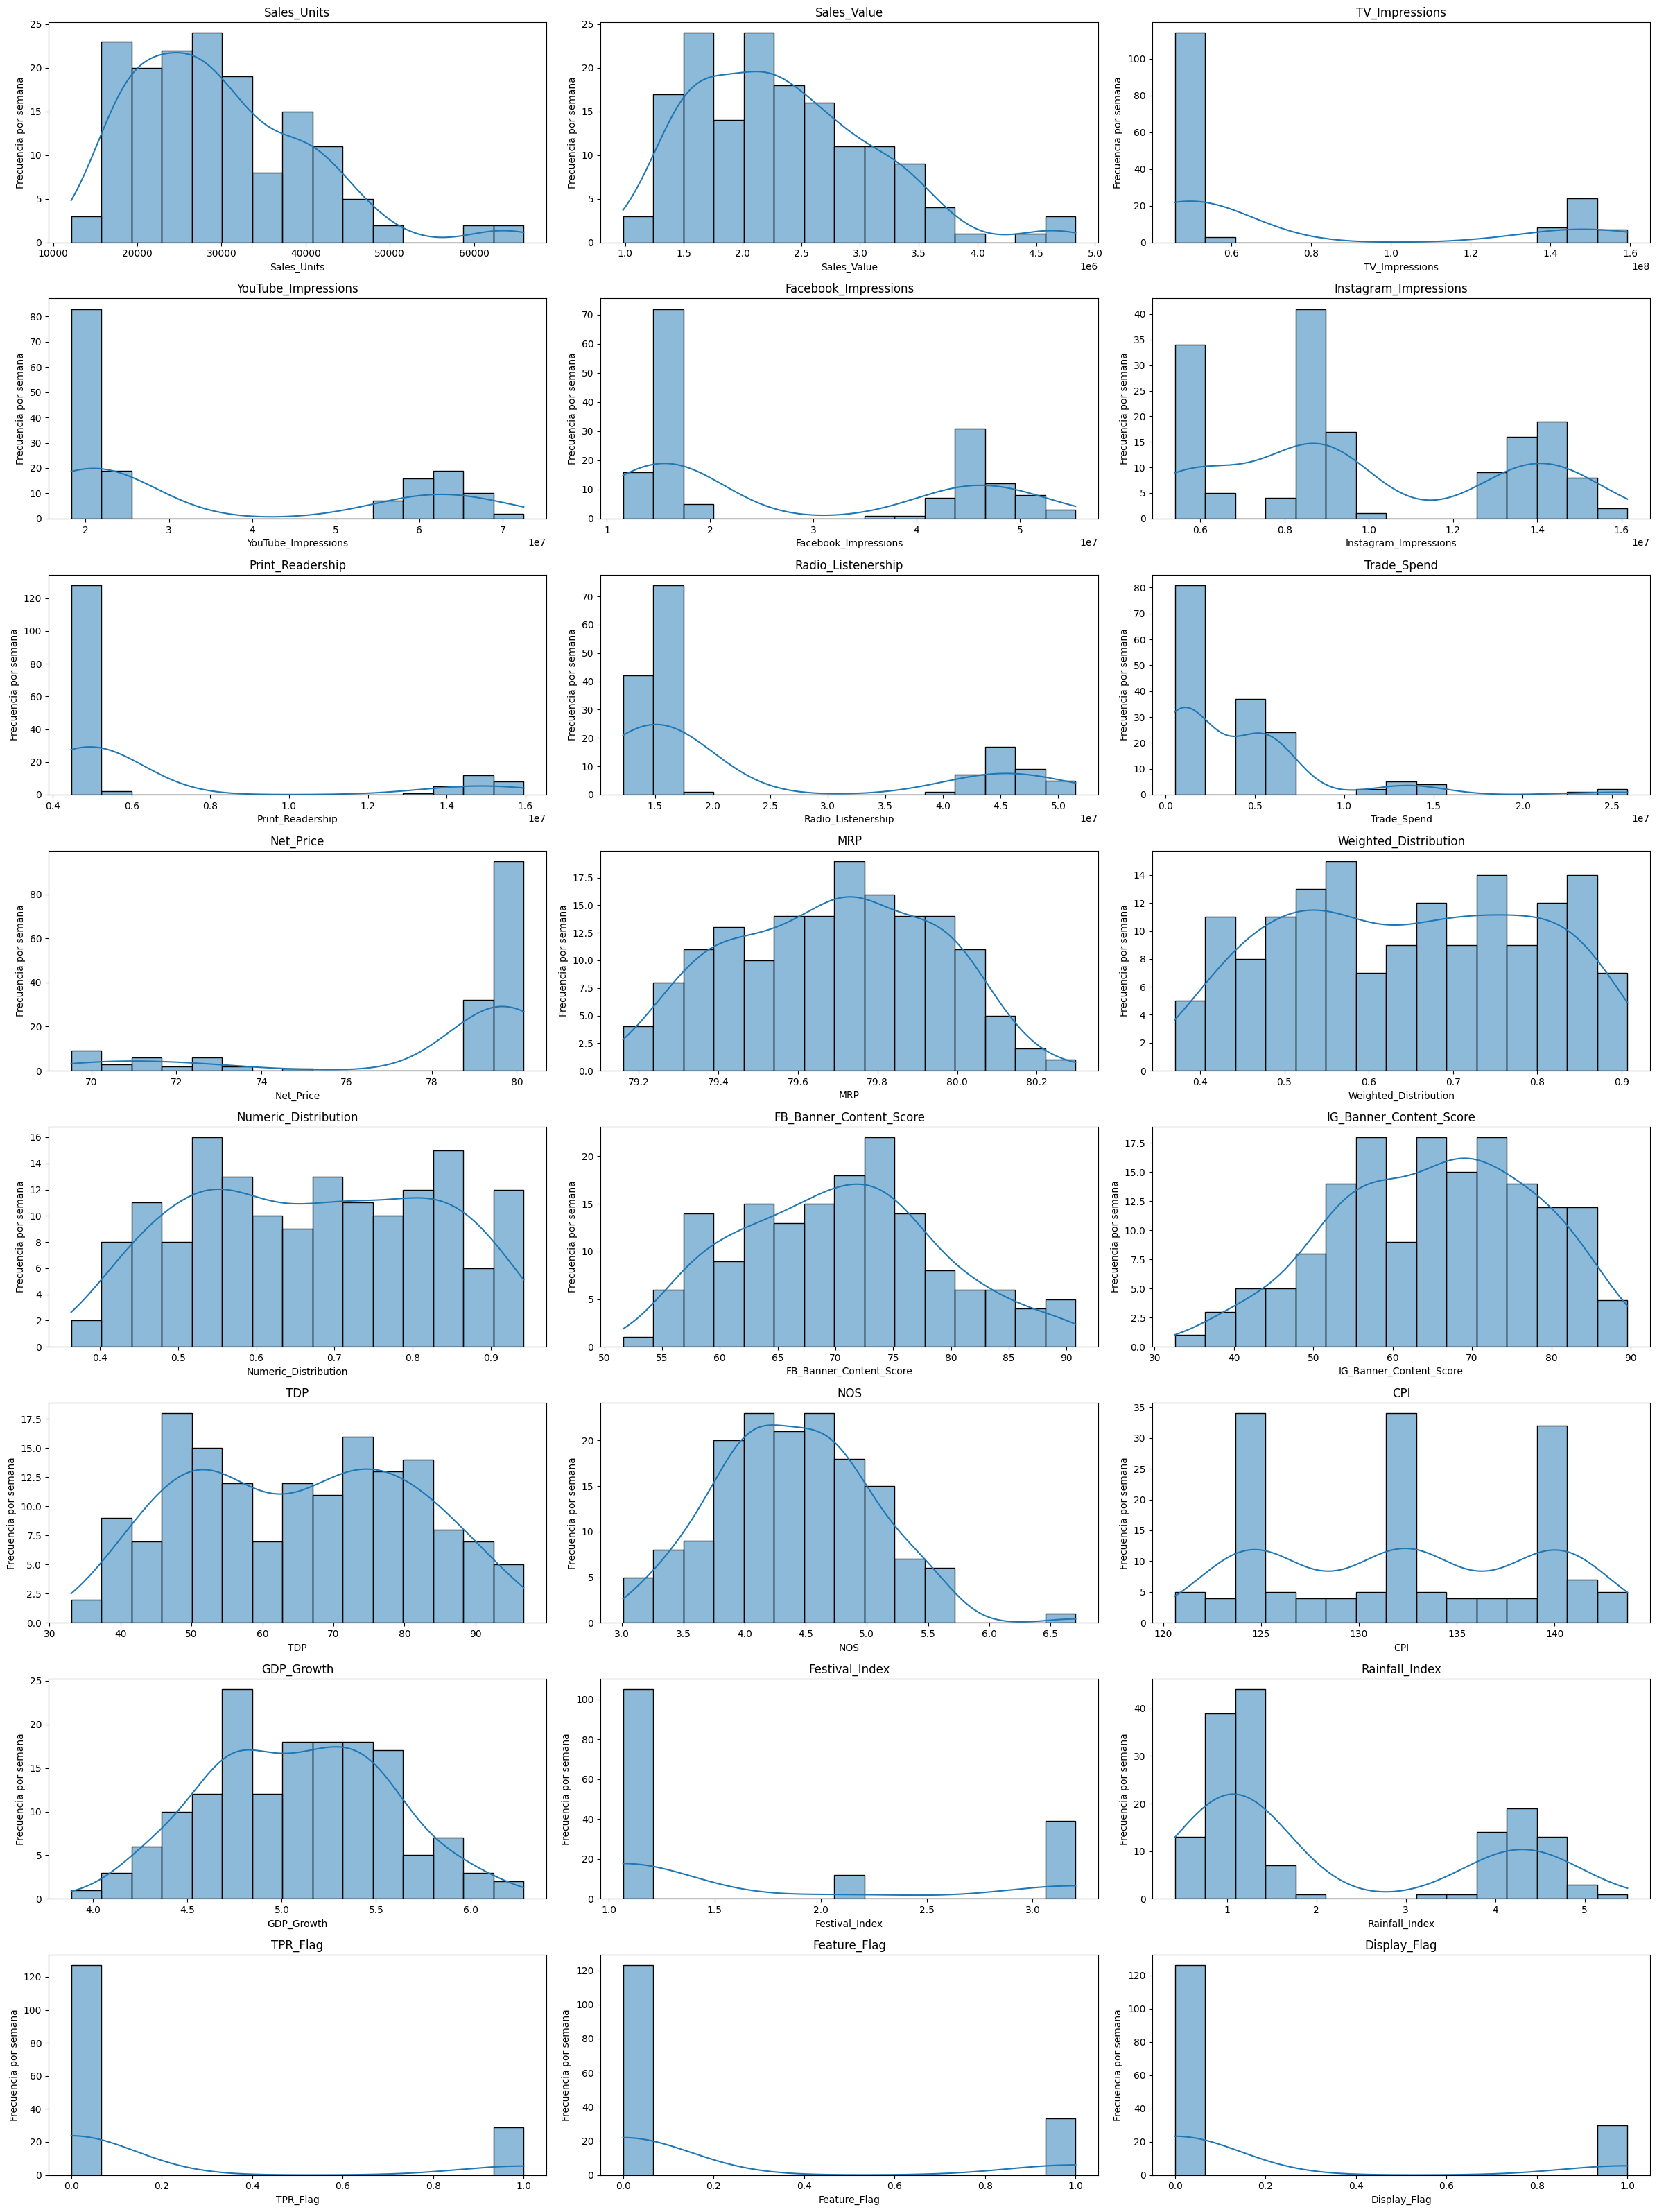

In [23]:
# Histograma de las columnas numericas en el DataFrame semanal
# for col in weekly:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(weekly[col], bins=15, kde=True)
#     plt.title(f'Histograma de {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frecuencia por semana')
#     plt.show()



cols = list(weekly.columns)
n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8*ncols, 4*nrows))

# asegurar arreglo 2D
axes = axes.reshape(nrows, ncols)

for i, col in enumerate(cols):
    r, c = divmod(i, ncols)
    ax = axes[r, c]
    sns.histplot(weekly[col], bins=15, kde=True, ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia por semana')

plt.tight_layout()
plt.show()



**Hacemos una grafica de correlacion de los datos**

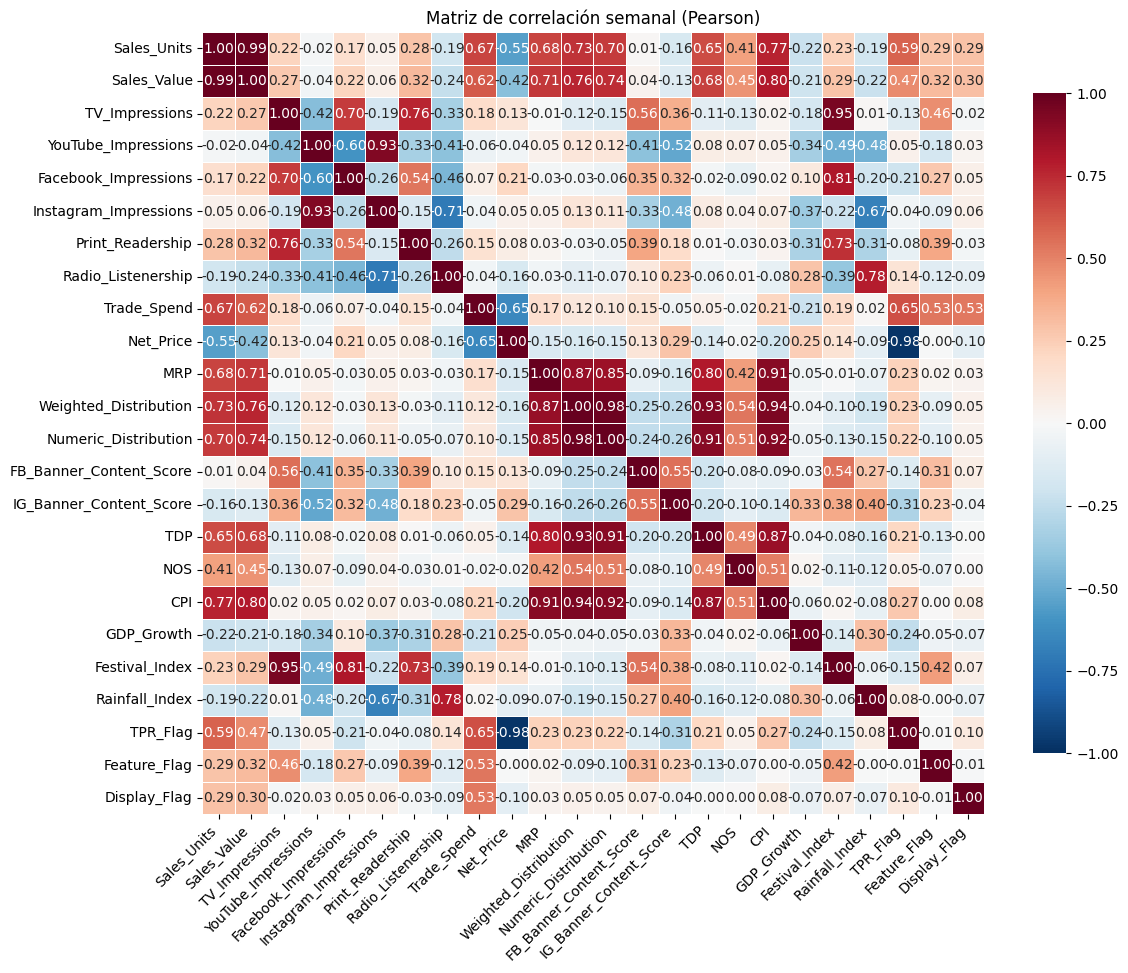

In [24]:
corr_pearson = weekly.corr() # relación lineal
corr = corr_pearson  # o corr_spearman
#mask = np.triu(np.ones_like(corr, dtype=bool))  # oculta triángulo sup.

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    #mask=mask,                 # oculta triángulo superior
    annot=True, fmt=".2f",     # números dentro de cada celda
    cmap="RdBu_r",             # rojo(+) / azul(-) 
    vmin=-1, vmax=1, center=0, # escala fija -1..1
    linewidths=.5, square=True,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45, ha="right")
plt.title("Matriz de correlación semanal (Pearson)")
plt.tight_layout()
plt.show()


Buscamos la relacion entre las columnas 

Descartamos PCA por pocos valores para con alta correalcion

- Facebook = TV ----PC1 
- insta = youtube ---PC2 
- print = TV ---PC3 
- Print = FB --PC4

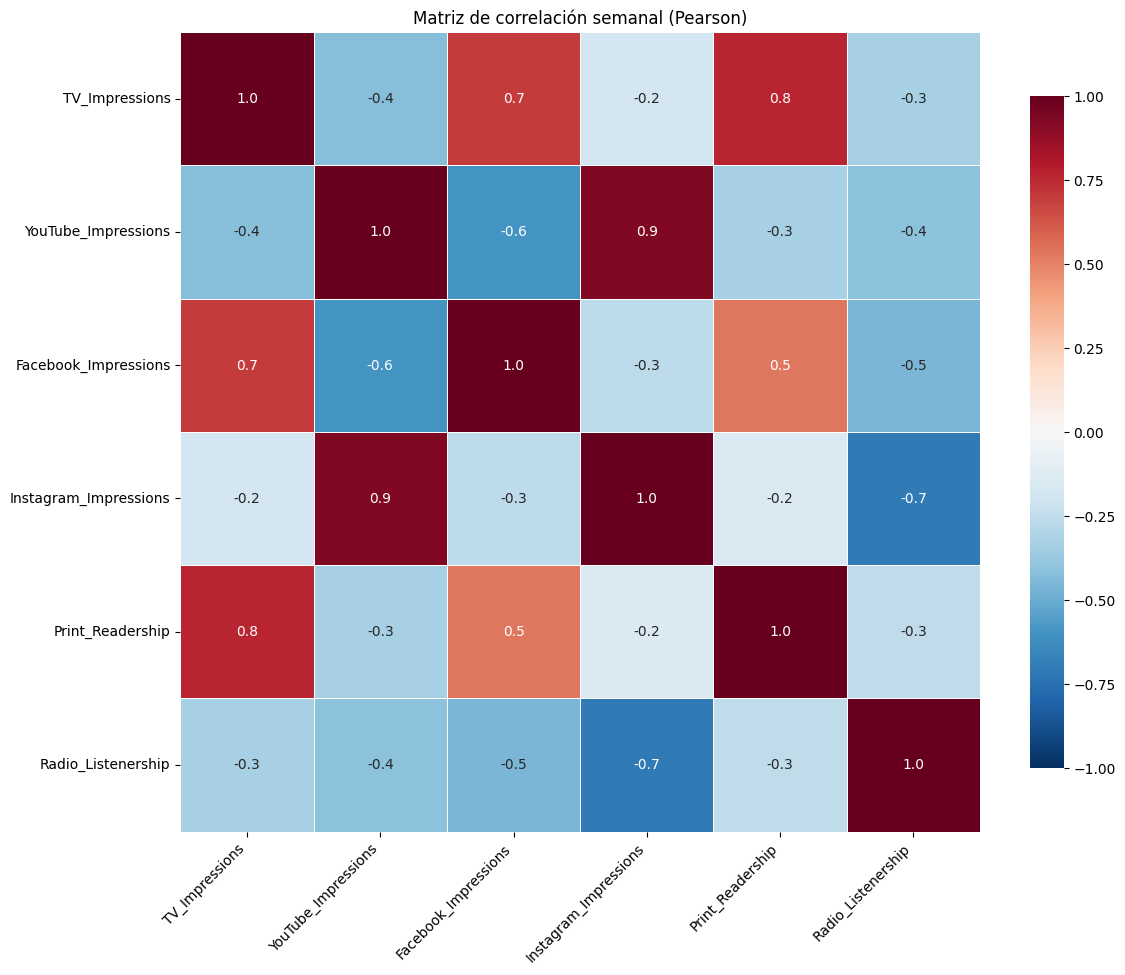

In [25]:
X = weekly[['TV_Impressions', 'YouTube_Impressions','Facebook_Impressions', 'Instagram_Impressions','Print_Readership', 'Radio_Listenership']].corr()
#mask = np.triu(np.ones_like(X, dtype=bool))  # oculta triángulo sup.

plt.figure(figsize=(12,10))
sns.heatmap(
    X,
    #mask=mask,                 # oculta triángulo superior
    annot=True, fmt=".1f",     # números dentro de cada celda
    cmap="RdBu_r",             # rojo(+) / azul(-) 
    vmin=-1, vmax=1, center=0, # escala fija -1..1
    linewidths=.5, square=True,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45, ha="right")
plt.title("Matriz de correlación semanal (Pearson)")
plt.tight_layout()
plt.show()

No hay mucha relacion entre la publiciad mediatica o de redes sociales con las ventas totales

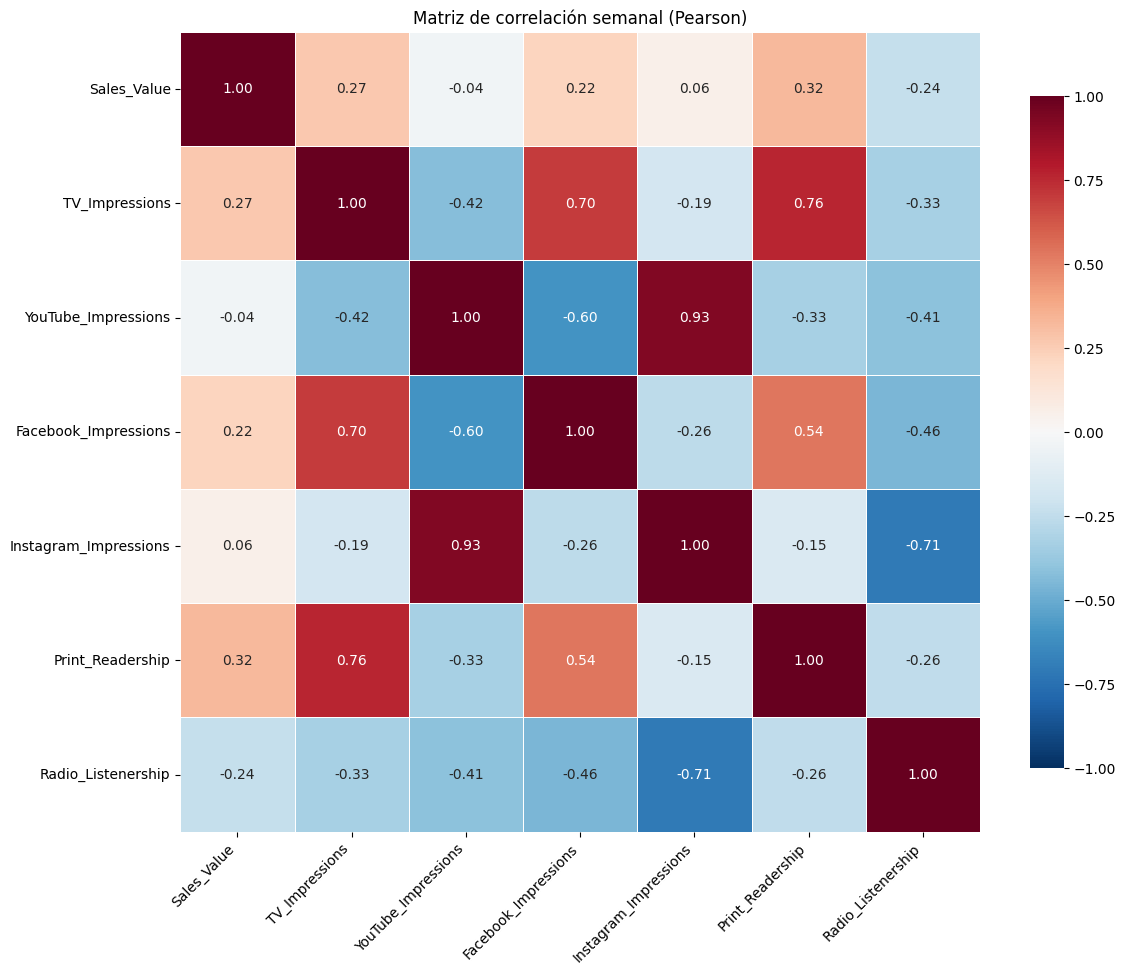

In [35]:
X = weekly[['Sales_Value','TV_Impressions', 'YouTube_Impressions','Facebook_Impressions', 'Instagram_Impressions','Print_Readership', 'Radio_Listenership']].corr()
#mask = np.triu(np.ones_like(X, dtype=bool))  # oculta triángulo sup.

plt.figure(figsize=(12,10))
sns.heatmap(
    X,
    #mask=mask,                 # oculta triángulo superior
    annot=True, fmt=".2f",     # números dentro de cada celda
    cmap="RdBu_r",             # rojo(+) / azul(-) 
    vmin=-1, vmax=1, center=0, # escala fija -1..1
    linewidths=.5, square=True,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45, ha="right")
plt.title("Matriz de correlación semanal (Pearson)")
plt.tight_layout()
plt.show()

Separamo las columanas que si que tienen mas correlacion con las ventas

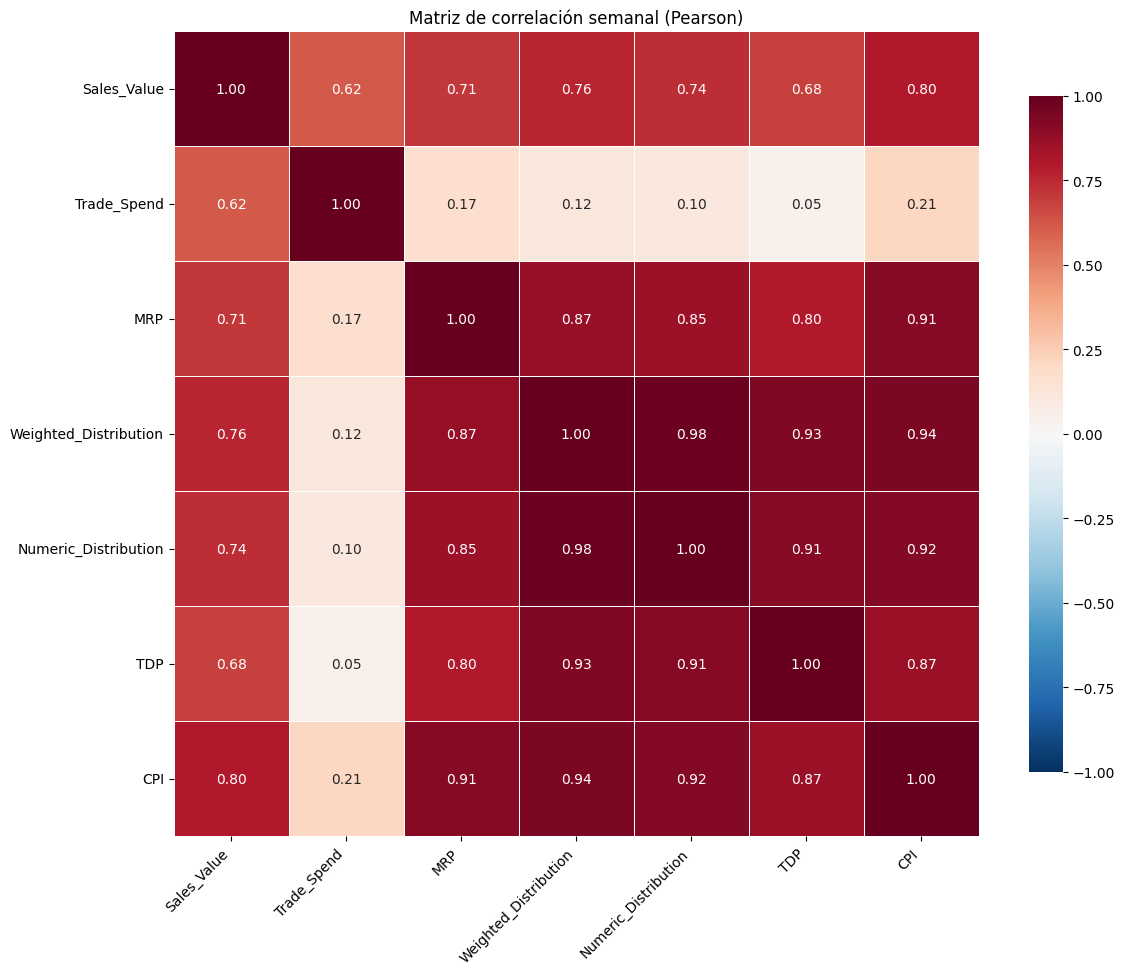

In [27]:
X = weekly[['Sales_Value',"Trade_Spend","MRP","Weighted_Distribution","Numeric_Distribution","TDP","CPI"]].corr()
#mask = np.triu(np.ones_like(X, dtype=bool))  # oculta triángulo sup.

plt.figure(figsize=(12,10))
sns.heatmap(
    X,
    #mask=mask,                 # oculta triángulo superior
    annot=True, fmt=".2f",     # números dentro de cada celda
    cmap="RdBu_r",             # rojo(+) / azul(-) 
    vmin=-1, vmax=1, center=0, # escala fija -1..1
    linewidths=.5, square=True,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45, ha="right")
plt.title("Matriz de correlación semanal (Pearson)")
plt.tight_layout()
plt.show()

Revisamos el VIF para saber que columnas se relacionan mucho con otras y tenerlas en el modelo podria ser redundate

- VIF cercano a 1 → No hay multicolinealidad (la variable es independiente).
- VIF entre 1 y 5 → Multicolinealidad aceptable, no problemático.
- VIF entre 5 y 10 → Multicolinealidad moderada, revisa con cuidado.
- VIF > 10 → Problema serio: la variable está muy colineada con otras, y puede distorsionar los coeficientes del modelo.

In [28]:


X = weekly[['Trade_Spend','MRP','Weighted_Distribution','Numeric_Distribution','TDP','CPI']]
X = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                Variable            VIF
0                  const  528170.963379
1            Trade_Spend       1.149936
2                    MRP       5.785376
3  Weighted_Distribution      38.864250
4   Numeric_Distribution      24.402471
5                    TDP       7.297844
6                    CPI      13.868620


- Por lo visto la variabe hay columnas muy parecidas asi que optermos por quedarnos solo con una de esas dos otaremos por quedarnos con **Numerric**
- con **CPI** y **MRP** optaremos tambien el quedarnos solo con un de los dos en este caso el el que dio menos VIF fue **MRP**
- Se elimino **TDP** tambien porque causaba altos VIF en laas columnas de distrribucion
- **Trade_Spend** aporta la parte de inversión.
- **Numeric_Distribution** aporta cobertura en tiendas.
- **MRP** aporta precio.
- No hay dos variables que estén diciendo lo mismo asi que el modelo queda más limpio y los VIF bajan.

In [29]:
X = weekly[['Trade_Spend','Numeric_Distribution','MRP']]
X = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               Variable            VIF
0                 const  372980.424049
1           Trade_Spend       1.036477
2  Numeric_Distribution       3.698722
3                   MRP       3.767892


De la siguiente manera nos queda nuestra matriz de correlacion de las columnas que mas influyen en las ventas

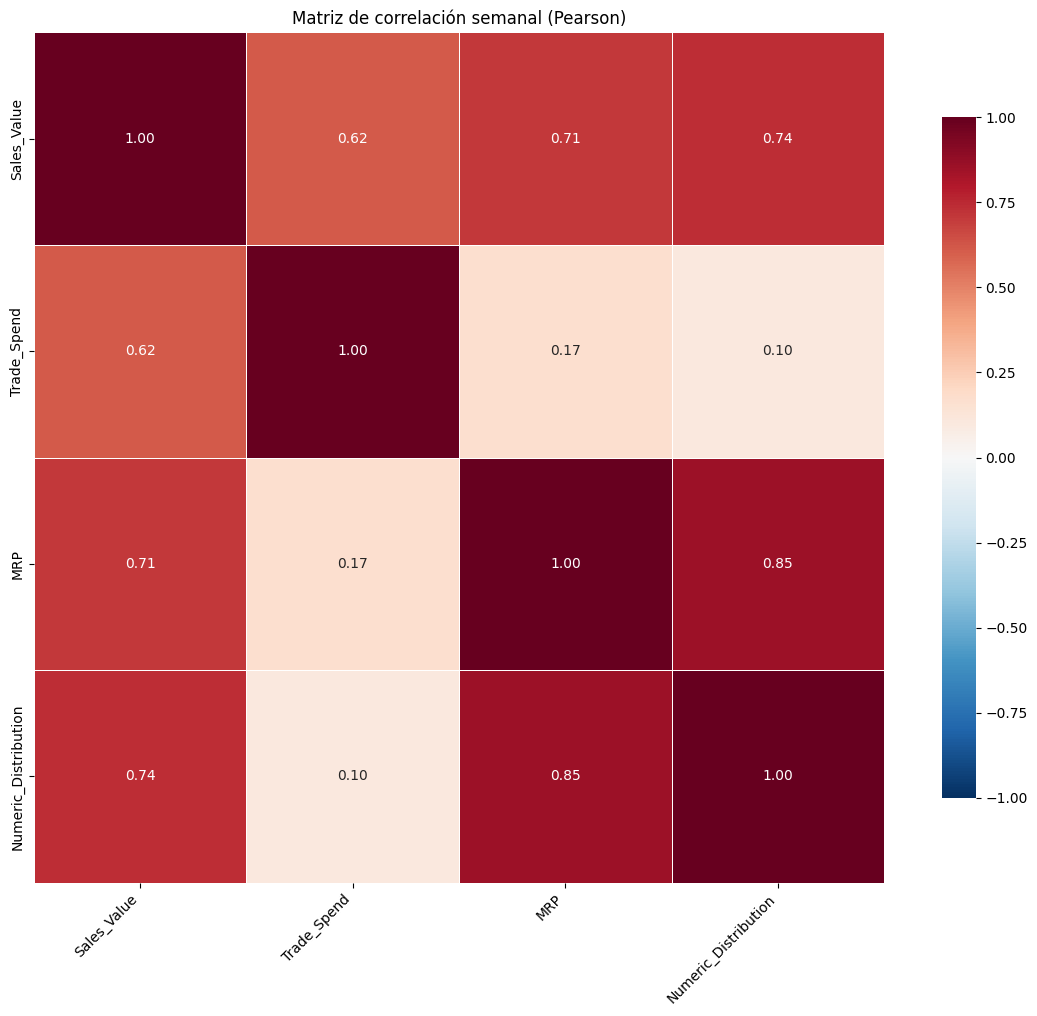

In [30]:
X = weekly[['Sales_Value',"Trade_Spend","MRP","Numeric_Distribution"]].corr()
#mask = np.triu(np.ones_like(X, dtype=bool))  # oculta triángulo sup.

plt.figure(figsize=(12,10))
sns.heatmap(
    X,
    #mask=mask,                 # oculta triángulo superior
    annot=True, fmt=".2f",     # números dentro de cada celda
    cmap="RdBu_r",             # rojo(+) / azul(-) 
    vmin=-1, vmax=1, center=0, # escala fija -1..1
    linewidths=.5, square=True,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45, ha="right")
plt.title("Matriz de correlación semanal (Pearson)")
plt.tight_layout()
plt.show()

Confirmamos que tampoco trade_spend tiene ninguna correlacion con la publicidad 

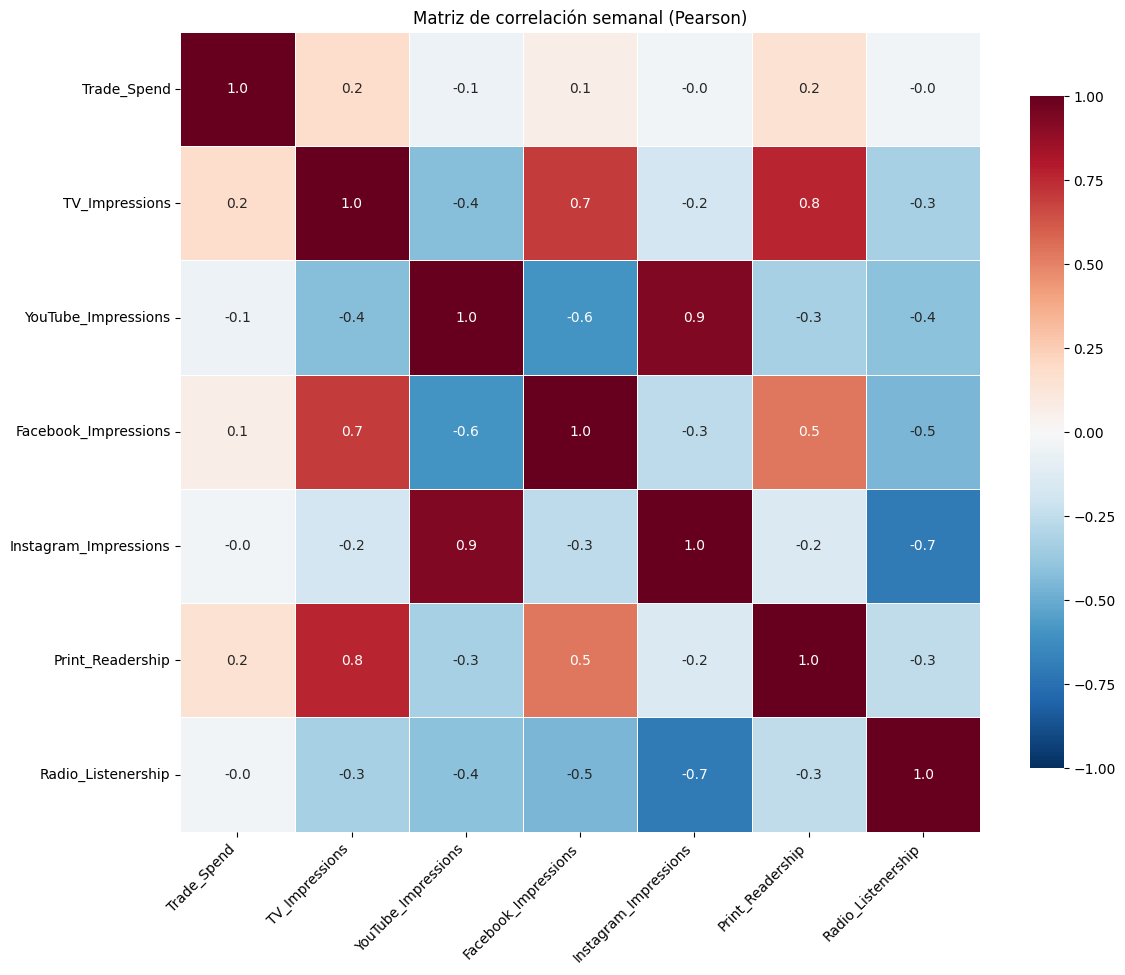

In [31]:
X = weekly[["Trade_Spend",'TV_Impressions', 'YouTube_Impressions','Facebook_Impressions', 'Instagram_Impressions','Print_Readership', 'Radio_Listenership']].corr()
#mask = np.triu(np.ones_like(X, dtype=bool))  # oculta triángulo sup.

plt.figure(figsize=(12,10))
sns.heatmap(
    X,
    #mask=mask,                 # oculta triángulo superior
    annot=True, fmt=".1f",     # números dentro de cada celda
    cmap="RdBu_r",             # rojo(+) / azul(-) 
    vmin=-1, vmax=1, center=0, # escala fija -1..1
    linewidths=.5, square=True,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45, ha="right")
plt.title("Matriz de correlación semanal (Pearson)")
plt.tight_layout()
plt.show()

Aqui buscamos ver si la correalcion entre ventas y la publicad sufri algun lag, es decir se pagaba publiciad pero tardaba en refeljarse el veneficio pero todo parece indicar que no es asi tanto para **sales_value** como para **trade_spend**


In [32]:

for lag in range(0, 52):  # probar hasta 4 semanas de retraso
    corr = weekly['Sales_Value'].corr(weekly['TV_Impressions'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")
    
print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Sales_Value'].corr(weekly['YouTube_Impressions'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")
    
print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Sales_Value'].corr(weekly['Facebook_Impressions'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")

print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Sales_Value'].corr(weekly['Instagram_Impressions'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")
    
print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Sales_Value'].corr(weekly['Print_Readership'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")
    
print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Sales_Value'].corr(weekly['Radio_Listenership'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")

print("----------------------------------------------------------------------------------------------------------------------")

for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Trade_Spend'].corr(weekly['TV_Impressions'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")
    
print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Trade_Spend'].corr(weekly['YouTube_Impressions'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")
    
print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Trade_Spend'].corr(weekly['Facebook_Impressions'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")

print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Trade_Spend'].corr(weekly['Instagram_Impressions'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")
    
print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Trade_Spend'].corr(weekly['Print_Readership'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")
    
print(" ")
for lag in range(0, 11):  # probar hasta 4 semanas de retraso
    corr = weekly['Trade_Spend'].corr(weekly['Radio_Listenership'].shift(lag))
    print(f"Lag {lag} semanas: correlación = {corr:.2f}")

Lag 0 semanas: correlación = 0.27
Lag 1 semanas: correlación = 0.31
Lag 2 semanas: correlación = 0.33
Lag 3 semanas: correlación = 0.32
Lag 4 semanas: correlación = 0.26
Lag 5 semanas: correlación = 0.24
Lag 6 semanas: correlación = 0.21
Lag 7 semanas: correlación = 0.22
Lag 8 semanas: correlación = 0.18
Lag 9 semanas: correlación = 0.11
Lag 10 semanas: correlación = 0.07
Lag 11 semanas: correlación = 0.01
Lag 12 semanas: correlación = -0.03
Lag 13 semanas: correlación = -0.08
Lag 14 semanas: correlación = -0.15
Lag 15 semanas: correlación = -0.17
Lag 16 semanas: correlación = -0.17
Lag 17 semanas: correlación = -0.17
Lag 18 semanas: correlación = -0.18
Lag 19 semanas: correlación = -0.18
Lag 20 semanas: correlación = -0.21
Lag 21 semanas: correlación = -0.23
Lag 22 semanas: correlación = -0.22
Lag 23 semanas: correlación = -0.20
Lag 24 semanas: correlación = -0.18
Lag 25 semanas: correlación = -0.17
Lag 26 semanas: correlación = -0.14
Lag 27 semanas: correlación = -0.11
Lag 28 semanas

**Conclimos** *Paradoja de Simpson* 

**En palabras sencillas, en varios subgrupos puede haber una relación clara entre dos variables, pero al agrupar los datos en un solo conjunto, la relación puede volverse opuesta o desaparecer.**

**La paradoja típicamente aparece cuando se agregan datos sin considerar una variable "oculta" o "de confusión", la cual está correlacionada tanto con la variable independiente como con la dependiente. Desatender esta variable puede llevar a interpretaciones erróneas que resultan en conclusiones contrarias a las obtenidas a nivel de subconjuntos. La paradoja resalta la importancia de interpretar los resultados estadísticos dentro de su contexto y estructura de datos, reconociendo siempre los posibles factores que pueden estar sesgando los promedios o porcentajes observados.**



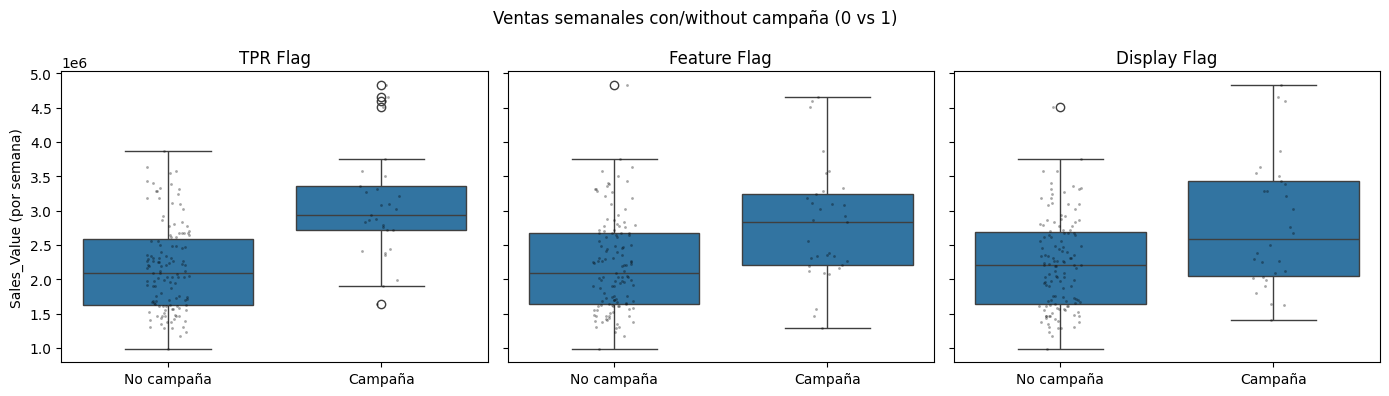

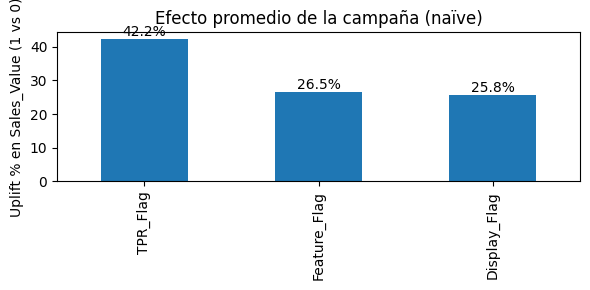

In [ ]:
# Analisis del efecto de las campañas (flags) en las ventas (Sales_Value)

flags = ["TPR_Flag", "Feature_Flag", "Display_Flag"]

# ------------ 1) BOXPLOTS 0 vs 1 POR CADA FLAG ------------
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
for ax, f in zip(axes, flags):
    tmp = weekly[[f, "Sales_Value"]].dropna().copy()
    tmp[f"_txt"] = tmp[f].map({0: "No campaña", 1: "Campaña"})
    sns.boxplot(data=tmp, x=f"_txt", y="Sales_Value", ax=ax)
    sns.stripplot(data=tmp, x=f"_txt", y="Sales_Value", ax=ax, color="k", size=2, alpha=0.35)
    ax.set_title(f.replace("_", " "))
    ax.set_xlabel("")
axes[0].set_ylabel("Sales_Value (por semana)")
plt.suptitle("Ventas semanales con/without campaña (0 vs 1)")
plt.tight_layout()
plt.show()

# ------------ 2) BARRA DE UPLIFT % (PROMEDIO 1 vs 0) ------------
uplift = {}
for f in flags:
    g = weekly.groupby(f)["Sales_Value"].mean()
    if 0 in g and 1 in g and g[0] != 0:
        uplift[f] = (g[1] - g[0]) / g[0] * 100
    else:
        uplift[f] = float("nan")

uplift_s = pd.Series(uplift).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 3))
uplift_s.plot(kind="bar", ax=ax)
ax.set_ylabel("Uplift % en Sales_Value (1 vs 0)")
ax.set_title("Efecto promedio de la campaña (naïve)")
for i, v in enumerate(uplift_s.values):
    if pd.notna(v):
        ax.text(i, v, f"{v:.1f}%", ha="center", va="bottom")
plt.tight_layout()
plt.show()


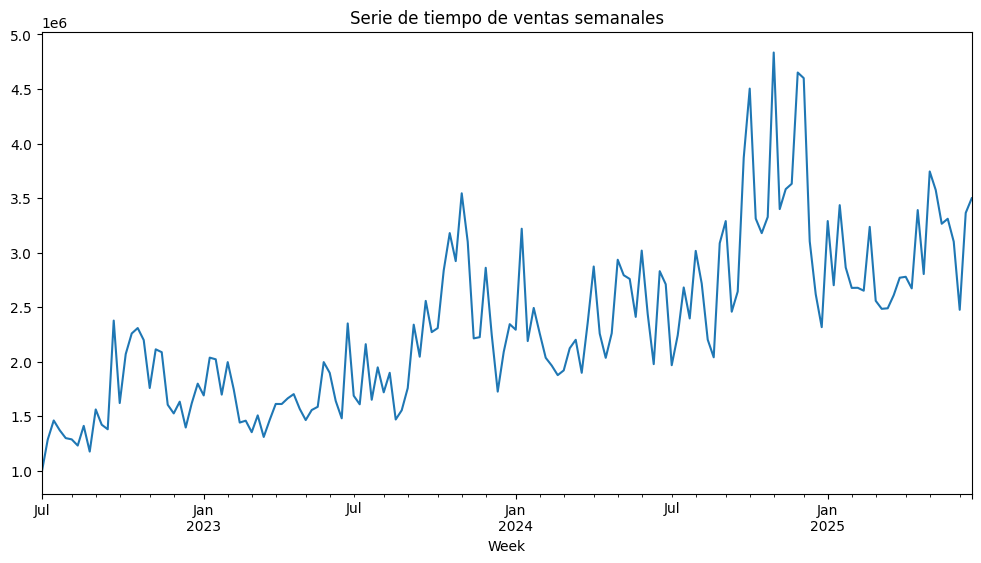

In [ ]:
plt.figure(figsize=(12,6))
weekly['Sales_Value'].plot()
plt.title("Serie de tiempo de ventas semanales")
plt.show()


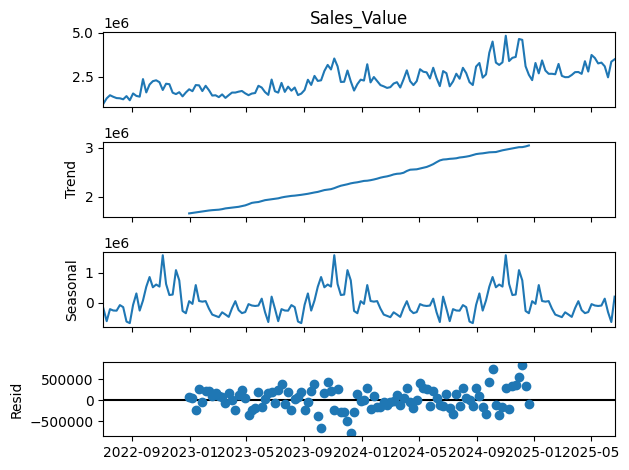

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(weekly['Sales_Value'], model='additive', period=52) # 52 semanas ~ 1 año
result.plot()
plt.show()


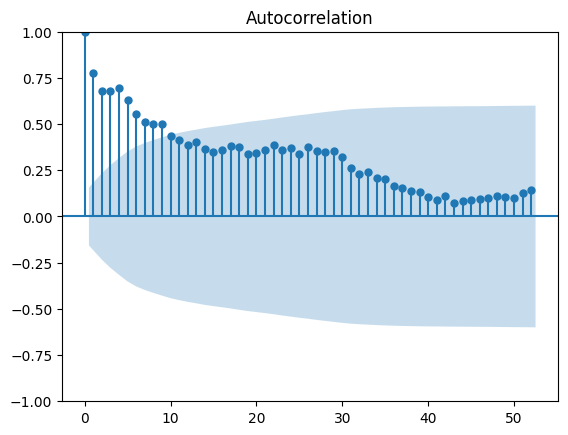

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(weekly['Sales_Value'], lags=52)
plt.show()
